The pupose of the code is to test Hypothesis 4: **Bots are less likely to be geographically consistent or provide accurate location data.**

Data Points: geo_enabled, location.
Analyze the geographical consistency of tweets from users with geo_enabled. Bots may have geo_enabled but rarely use it, or they may provide vague or changing location information.



In [2]:
import numpy as np
import pandas as pd

In [3]:
url = 'https://raw.githubusercontent.com/amiism/DSA4263/main/data/UsersData/combined_users_full.csv'
df1 = pd.read_csv(url)
# Dataset is now stored in a Pandas Dataframe

In [4]:
# Drop columns with zero non-null elements
df2 = df1.dropna(axis=1, how='all')

In [5]:
similar_split_columns=['url', 'default_profile_image', 'profile_background_tile', 'is_translator', 'protected', 'verified']

In [6]:
# Create df3 by dropping columns with more than 50% missing values and similar split between types
df3 = df2.drop(columns=similar_split_columns)

In [ ]:
df3['geo_enabled'].head(10)

0    NaN
1    1.0
2    NaN
3    1.0
4    NaN
5    NaN
6    NaN
7    NaN
8    NaN
9    NaN
Name: geo_enabled, dtype: float64

In [ ]:
df3['geo_enabled'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 11017 entries, 0 to 11016
Series name: geo_enabled
Non-Null Count  Dtype  
--------------  -----  
3294 non-null   float64
dtypes: float64(1)
memory usage: 86.2 KB


In [7]:
# Replace NaN values with 0
df3['geo_enabled'] = df3['geo_enabled'].fillna(0)

# Convert float to integer
df3['geo_enabled'] = df3['geo_enabled'].astype(int)

# Display the first few rows to verify the conversion
df3['geo_enabled'].head(10)

0    0
1    1
2    0
3    1
4    0
5    0
6    0
7    0
8    0
9    0
Name: geo_enabled, dtype: int64

In [8]:
# Group data by 'Type' and count occurrences of 'geo_enabled'
geo_enabled_counts = df3.groupby('Type')['geo_enabled'].value_counts()

# Print the counts
print(geo_enabled_counts)


Type     geo_enabled
Bot      0              6404
         1              1139
Genuine  1              2155
         0              1319
Name: count, dtype: int64


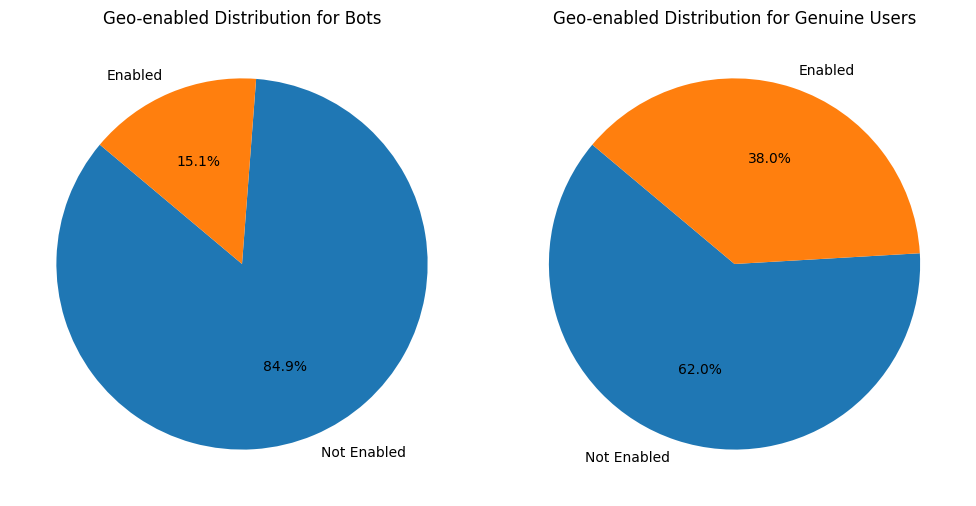

In [9]:
import matplotlib.pyplot as plt

# Group data by 'Type' and count occurrences of 'geo_enabled'
geo_enabled_counts = df3.groupby('Type')['geo_enabled'].value_counts()

# Extract counts for each 'Type'
bot_counts = geo_enabled_counts['Bot']
genuine_counts = geo_enabled_counts['Genuine']

# Plot pie chart for 'Bot'
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.pie(bot_counts, labels=['Not Enabled', 'Enabled'], autopct='%1.1f%%', startangle=140)
plt.title('Geo-enabled Distribution for Bots')

# Plot pie chart for 'Genuine'
plt.subplot(1, 2, 2)
plt.pie(genuine_counts, labels=['Not Enabled', 'Enabled'], autopct='%1.1f%%', startangle=140)
plt.title('Geo-enabled Distribution for Genuine Users')

plt.tight_layout()
plt.show()


This result is promising and shows we should consider this in our final model

In [10]:
df3['location'].head(50)

0                         NaN
1                     Ontario
2               abruzzo-italy
3                         NaN
4                         NaN
5                 Chicago, IL
6                         NaN
7                         NaN
8                         NaN
9                   Worldwide
10                     Taiwan
11    Broken Arrow/Stillwater
12                        NaN
13            Santiago, Chile
14                        NaN
15                        NaN
16                        NaN
17                        NaN
18                        NaN
19                        NaN
20                    Perugia
21                    Twitter
22                        NaN
23                        NaN
24                 Wellington
25          Brunei Darussalam
26                        NaN
27    my location is out here
28                        NaN
29                    Twitter
30                #tsunamimob
31                        NaN
32                        NaN
33     Ceb

In [11]:
# Get unique locations
unique_locations = df3['location'].unique()

# Print the list of unique locations
unique_locations

array([nan, 'Ontario', 'abruzzo-italy', ..., 'on my labtop',
       'Palm Springs, California', 'Bangladesh,Asia'], dtype=object)

In [12]:
len(unique_locations)

2552

In [13]:
# Set pandas option to display all rows
pd.set_option('display.max_rows', None)

# Print the first 100 entries of unique_locations
print(unique_locations[:100])

[nan 'Ontario' 'abruzzo-italy' 'Chicago, IL' 'Worldwide' 'Taiwan'
 'Broken Arrow/Stillwater' 'Santiago, Chile' 'Perugia' 'Twitter'
 'Wellington' 'Brunei Darussalam' 'my location is out here' '#tsunamimob'
 'Cebu City, Philippines' 'Salt Lake City, UT' "L'algerie" 'Newark, NJ'
 'Milano ' 'Roanoke, VA' 'LA, California' '(south) bay area'
 'United States' 'Bergamo' 'North Carolina Non-Metro' 'New Mexico'
 'Campinas-SP' 'Kailua Kona★ | 76 South º |' 'Triad Area, NC'
 'Paphos, Cyprus' 'Bay Area' 'Benin' 'LA Raised Me' 'Tulsa, OK'
 'Nassau County, NY' 'Tampa Bay, FLORIDA' 'Trinidad' 'Toronto' '3-22-15'
 'Colorado, USA' 'Puerto Rico' 'Oklahoma City, OK' 'In giro per casa'
 'Firenze' 'S\\xe3o Paulo-SP' 'Miami & Chicago' 'Ramapo, NY'
 'Mexico , Guadalajara Jalisco' 'Planet Earth' 'Central California '
 'jersey' 'US' 'Genova' 'Providence, RI' 'Orlando, FL' 'Tokyo, Japan'
 'Great Britain' 'Middletown, CT' 'Salento' 'Napoli '
 'Baguio City, Philippines' 'Pakistan' 'Philippines' 'Brescia' 'Gibralta

In [14]:
# Get the counts of each location
location_counts = df3['location'].value_counts()

# Find the most common location
most_common_location = location_counts.idxmax()

# Print the most common location
print("Most common location:", most_common_location)


Most common location: Roma


Roma may be a common location because one of the bot datasets were created from bots that created by the team of an Italian politician

In [16]:
unique_locations_by_type = df3.groupby('Type')['location'].unique()

# Get unique locations for each type
unique_locations_bot = set(unique_locations_by_type['Bot'])
unique_locations_genuine = set(unique_locations_by_type['Genuine'])

# Get the common unique locations between types
common_locations = unique_locations_bot.intersection(unique_locations_genuine)

# Print the common unique locations
print("Common unique locations between Bot and Genuine accounts:")
print(common_locations)
len(common_locations)

Common unique locations between Bot and Genuine accounts:
{'Melbourne', 'New York, NY', 'ireland', 'Europe', 'Las Vegas, NV', 'Bangladesh', 'Memphis, TN', 'LA', 'Dallas, TX', 'India', 'Charlotte', 'Melbourne, Australia', 'DFW, Texas', 'Pune, India', 'Rhode Island', 'Idaho, USA', 'Toronto, Canada', 'Singapore', 'US', 'Seattle', 'Oklahoma, USA', nan, 'Washington', 'Switzerland', 'Earth', 'Papua New Guinea', 'Atlanta', 'Orange County, CA', 'Silicon Valley', 'Massachusetts, USA', 'Buffalo', 'Canberra, Australia', 'UK', 'Mexico', 'Globally', 'Jamaica', 'Kansas', 'Sweden', 'Planet Earth', 'San Diego, CA', 'San Jose', 'Los Angeles, CA', 'Toronto', 'Minnesota, USA', 'Beijing', 'Austria', 'New Jersey', 'Chile', 'Peru', 'Bolivia', 'Finland', 'Venezuela', 'Sydney, Australia', 'Trinidad', 'New Orleans, LA', 'Mumbai', 'Arizona', 'Everywhere', 'California', 'Illinois', 'Washington, DC', 'Pakistan', 'Indonesia', 'new zealand ', 'Cincinnati, OH', 'Chandigarh, India', 'Santa Monica', 'United States', '

131

It is very difficult to use Location as a metric because both Genuine and Bot accounts use Locations that are not real and Bots have become very good

In [17]:
# Get the unique locations that are only in Bot accounts
unique_locations_only_bot = unique_locations_bot - unique_locations_genuine

# Get the unique locations that are only in Genuine accounts
unique_locations_only_genuine = unique_locations_genuine - unique_locations_bot

# Print the unique locations that are only in Bot accounts
print("Unique locations only in Bot accounts:")
print(unique_locations_only_bot)

# Print the unique locations that are only in Genuine accounts
print("\nUnique locations only in Genuine accounts:")
print(unique_locations_only_genuine)

Unique locations only in Bot accounts:
{'Lake Tahoe, NV', 'Viterbo', 'Hull', 'Korea', 'Houston, Texas', 'South Carolina USA', 'an\\xe1polis//GO', 'Jaipur', 'Alexandria, VA', 'Charleston, WV', 'Firenze', 'Salento', 'Botswana', 'Lexington, KY', 'North America', 'Iran', 'South Dakota USA', 'Ft. Lauderdale, FL', 'Northern Mariana Islands', 'Livorno', 'Manitoba', 'List Building, CyberSpace', 'Mar\\xedlia - SP', 'Brasil MG', "Ai piedi dell'Etna", 'Maldives', 'Saudi Arabia', 'Sydney', 'California Non-Metro', 'North Carolina Non-Metro', 'Kenya', 'Ataleia, MG  - Brasil', 'Georgia, USA', 'Kansas, USA', 'Island of Gardena, CA', 'Ohio', '221 Baker Street', 'Charlotte, NC', 'terra do nunca', 'Illinois Non-Metro', 'Navegantes - SC ', 'Milano - Cina', "Napoli e d'intorni", 'Ramapo, NY', 'Network Marketing  ', 'Roanoke, VA', 'Maring\\xe1/S\\xe3o Paulo', 'Middletown, CT', 'Verona ', 'tweetville', 'Sarasota, FL USA', 'Bologna', 'Veneto', 'Raleigh', 'Albany, NY', 'South Carolina Non-Metro', 'sempre molto

Most of the nonsensical locations are by Genuine people

In [19]:
# Count occurrences of each location for each type
location_counts_by_type = df3.groupby('Type')['location'].value_counts()

# Get the top 10 most common locations for each type
top_10_locations_by_type = {}
for account_type in df3['Type'].unique():
    top_10_locations_by_type[account_type] = location_counts_by_type[account_type].nlargest(10)

# Print the top 10 most common locations for each type
for account_type, top_locations in top_10_locations_by_type.items():
    print(f"Top 10 most common locations for {account_type}:")
    print(top_locations)
    print()

# Count the number of non-null locations for each type
non_null_location_counts_by_type = df3.groupby('Type')['location'].count()

# Print the number of non-null locations for each type
for account_type, count in non_null_location_counts_by_type.items():
    print(f"Number of rows with non-null location for {account_type}: {count}")


Top 10 most common locations for Bot:
location
Roma                    104
Twitter                  88
Milano                   63
Columbia, SC             51
Italia                   43
Milano                   40
Orlando, FL              40
Greater Hartford, CT     40
Torino                   39
Norfolk area, VA         38
Name: count, dtype: int64

Top 10 most common locations for Genuine:
location
Philippines            26
Dallas, TX             21
India                  19
Trinidad and Tobago    16
Los Angeles            15
New Zealand            15
Madrid                 15
California             13
New Delhi              13
Baguio City            13
Name: count, dtype: int64

Number of rows with non-null location for Bot: 2543
Number of rows with non-null location for Genuine: 2365


In [20]:
print(len(unique_locations_bot))

887


In [21]:
print(len(unique_locations_genuine))

1796


Genuine accounts use more varied locations compared to bots.